In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
%load_ext tensorboard

C:\Users\Piyush\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4422102/4422102 [==============================] - 16s 4us/step


In [3]:
tf.random.set_seed(42)
np.random.seed(42)

LAYERS = [ tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation="softmax")]


model = tf.keras.models.Sequential(LAYERS)

In [4]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trai

In [7]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4828 - accuracy: 0.8308 - val_loss: 0.4480 - val_accuracy: 0.8430
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4427 - accuracy: 0.8437 - val_loss: 0.4105 - val_accuracy: 0.8582
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4178 - accuracy: 0.8522 - val_loss: 0.4774 - val_accuracy: 0.8208
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4008 - accuracy: 0.8593 - val_loss: 0.3884 - val_accuracy: 0.8676
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3883 - accuracy: 0.8639 - val_loss: 0.3783 - val_accuracy: 0.8662
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3745 - accuracy: 0.8673 - val_loss: 0.3715 - val_accuracy: 0.8710
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3652 - accuracy: 0.8702 - val_loss: 0.3653 - val_accuracy:

In [10]:
import pandas as pd

<AxesSubplot: >

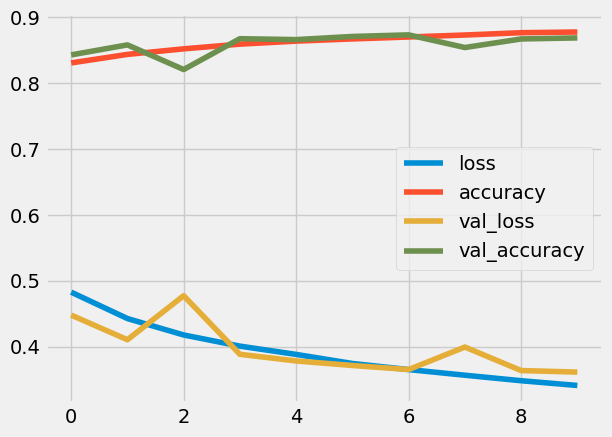

In [13]:
pd.DataFrame(history.history).plot()

In [14]:
del model

In [15]:
LAYERS_BN = [
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
]

model = tf.keras.models.Sequential(LAYERS_BN)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.5301 - accuracy: 0.8148 - val_loss: 0.3863 - val_accuracy: 0.8614
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3947 - accuracy: 0.8592 - val_loss: 0.3532 - val_accuracy: 0.8750
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3573 - accuracy: 0.8698 - val_loss: 0.3484 - val_accuracy: 0.8792
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3257 - accuracy: 0.8813 - val_loss: 0.3261 - val_accuracy: 0.8844
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3043 - accuracy: 0.8899 - val_loss: 0.3172 - val_accuracy: 0.8894
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2880 - accuracy: 0.8944 - val_loss: 0.3167 - val_accuracy: 0.8884
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2763 - accuracy: 0.8997 - val_loss: 0.3210 - val_accu

<AxesSubplot: >

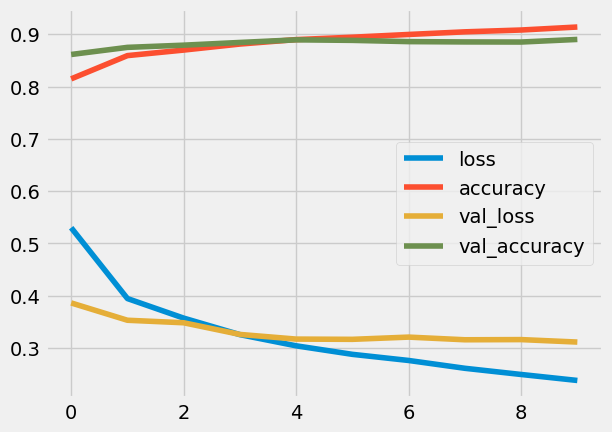

In [19]:
pd.DataFrame(history.history).plot()

In [20]:
bn1 = model.layers[1]
for variable in bn1.variables:
    print(f"variable name: {variable.name.split('/')[-1][:-2]}, \nis trainable: {variable.trainable}\n\n")

variable name: gamma, 
is trainable: True


variable name: beta, 
is trainable: True


variable name: moving_mean, 
is trainable: False


variable name: moving_variance, 
is trainable: False




In [21]:
del model 

In [22]:
LAYERS_BN_BIAS_FALSE = [
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]

model = tf.keras.models.Sequential(LAYERS_BN_BIAS_FALSE)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 300)               235200    
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_7 (Dense)             (None, 100)              

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.5788 - accuracy: 0.8056 - val_loss: 0.3974 - val_accuracy: 0.8662
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4158 - accuracy: 0.8533 - val_loss: 0.3539 - val_accuracy: 0.8772
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3754 - accuracy: 0.8673 - val_loss: 0.3453 - val_accuracy: 0.8790
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3434 - accuracy: 0.8783 - val_loss: 0.3264 - val_accuracy: 0.8810
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3223 - accuracy: 0.8839 - val_loss: 0.3147 - val_accuracy: 0.8862
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3036 - accuracy: 0.8913 - val_loss: 0.3158 - val_accuracy: 0.8888
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2929 - accuracy: 0.8951 - val_loss: 0.3069 - val_ac

<AxesSubplot: >

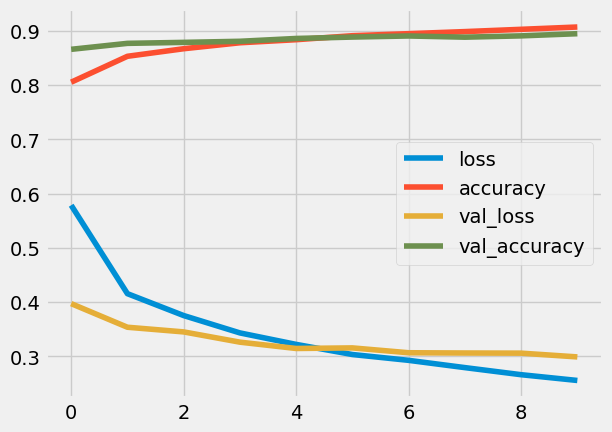

In [26]:
pd.DataFrame(history.history).plot()